In [2]:
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl
import os

In [4]:
# files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
# ride data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
# get column names and number of rows in each column that does not contain nulls
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# verify there are no null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# get data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# check number of data points for each type of city
# get unique values of type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# number of data points for urban cities
sum(city_data_df["type"] == "Urban")

66

In [12]:
# number of data points for urban cities
sum(city_data_df["type"] == "Suburban")

36

In [13]:
# number of data points for urban cities
sum(city_data_df["type"] == "Rural")

18

In [14]:
# get columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# confirm no nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# combine data to single data set
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = "city")
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# create urban cities dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [18]:
# suburban cities df
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1630,East Marymouth,2019-03-29 08:36:20,37.60,6370863861570,5,Suburban
1631,New Raymond,2019-02-25 21:40:18,20.44,5984505117874,17,Suburban
1632,Lake Robertside,2019-01-11 20:17:36,46.51,6574333011308,4,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban


In [19]:
# rural cities df
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


In [20]:
# create a series for number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
# create series for number of rides in suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [22]:
# create series for number of rides in rural area
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [23]:
# avg fare for each city in urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

# suburban and rural
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [24]:
# avg driver count for each city in urban, suburban, rural
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

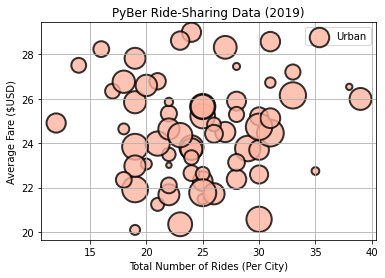

In [25]:
# scatter for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10 * urban_driver_count,
            alpha = 0.8,
            color = '#ffb4a2',
            edgecolors = "black",
            linewidth = 2,
            label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

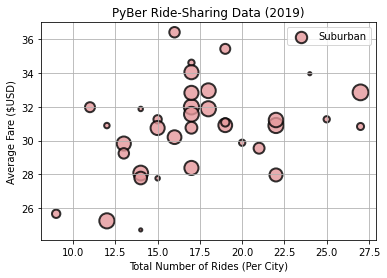

In [26]:
# scatter for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            alpha = 0.8,
            color = '#e5989b',
            edgecolors = "black",
            linewidth = 2,
            label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

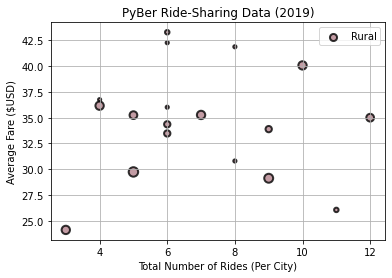

In [27]:
# scatter for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s = 10 * rural_driver_count,
            alpha = 0.8,
            color = '#b5838d',
            edgecolors = "black",
            linewidth = 2,
            label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

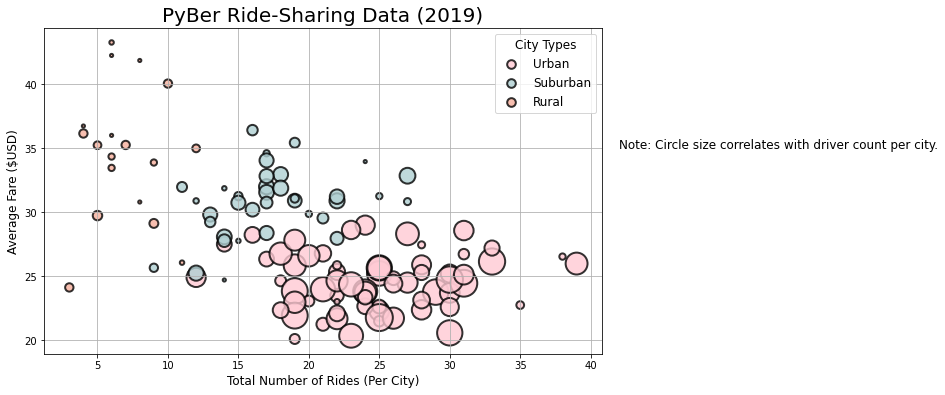

In [30]:
# customizing size of graph
plt.subplots(figsize = (10, 6))

# scatter for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10 * urban_driver_count,
            alpha = 0.8,
            color = '#ffcad4',
            edgecolors = "black",
            linewidth = 2,
            label = "Urban")

# scatter for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            alpha = 0.8,
            color = '#b0d0d3',
            edgecolors = "black",
            linewidth = 2,
            label = "Suburban")

# scatter for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s = 10 * rural_driver_count,
            alpha = 0.8,
            color = '#f7af9d',
            edgecolors = "black",
            linewidth = 2,
            label = "Rural")

# customizing details of graph
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($USD)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize = 12)

# customizing legend
lgnd = plt.legend(fontsize = 12,
                  mode = "expanded",
                  scatterpoints = 1,
                  loc = "best",
                  title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# save figure
plt.savefig(os.path.join("Plots_and_Figures/Fig1.png"), facecolor = 'white', transparent = False, bbox_inches = "tight")

plt.show()

In [ ]:
# summary statistics urban
urban_cities_df.describe()

In [97]:
# summary statistics suburban
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [99]:
# summary statistucs rural
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [100]:
# summary ride count, urban
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [101]:
# summary ride count, suburban
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [102]:
# summary ride count, rural
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [105]:
# mean ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [108]:
# median ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [109]:
# mode ride count for each city type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [111]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [113]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [114]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [115]:
# create series for the fares, urban
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [127]:
# measures of central tendency, fares, urban
mean_urban_fares = np.mean(urban_fares)
print(f"Mean: {mean_urban_fares:.2f}")

median_urban_fares = np.median(urban_fares)
print(f"Median: {median_urban_fares:.2f}")

mode_urban_fares = sts.mode(urban_fares)
print(f"Mode: {mode_urban_fares}")

Mean: 24.53
Median: 24.64
Mode: ModeResult(mode=array([22.86]), count=array([5]))


In [132]:
# series for fares, suburban
suburban_fares = suburban_cities_df["fare"]

# measures of central tendency, fares, suburban
mean_suburban_fares = np.mean(suburban_fares)
print(f"Mean: {mean_suburban_fares:.2f}")

median_suburban_fares = np.median(suburban_fares)
print(f"Median: {median_suburban_fares:.2f}")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"Mode: {mode_suburban_fares}")

Mean: 30.97
Median: 30.75
Mode: ModeResult(mode=array([17.99]), count=array([3]))


In [136]:
# series for fares, rural
rural_fares = rural_cities_df["fare"]

#measures of central tendency, fares, rural
mean_rural_fares = np.mean(rural_fares)
print(f"Mean: {mean_rural_fares:.2f}")

median_rural_fares = np.mean(rural_fares)
print(f"Median: {median_rural_fares:.2f}")

mode_rural_fares = sts.mode(rural_fares)
print(f"Mode: {mode_rural_fares}")

Mean: 34.62
Median: 34.62
Mode: ModeResult(mode=array([37.05]), count=array([2]))


In [137]:
# series for driver count, urban
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [142]:
# measures of central tendency, driver count, urban
mean_urban_drivers = np.mean(urban_drivers)
print(mean_urban_drivers)

median_urban_drivers = np.median(urban_drivers)
print(median_urban_drivers)

mode_urban_drivers = sts.mode(urban_drivers)
print(mode_urban_drivers)

36.67815384615385
37.0
ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [144]:
# series for driver count, suburban
suburban_drivers = suburban_cities_df['driver_count']

# measures of central tendency, driver count, suburban
mean_suburban_drivers = np.mean(suburban_drivers)
print(mean_suburban_drivers)

median_suburban_drivers = np.median(suburban_drivers)
print(median_suburban_drivers)

mode_suburban_drivers = sts.mode(suburban_drivers)
print(mode_suburban_drivers)

13.712
16.0
ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [145]:
# series for driver count, rural
rural_drivers = rural_cities_df['driver_count']

# measures of central tendency, driver count, suburban
mean_rural_drivers = np.mean(rural_drivers)
print(mean_rural_drivers)

median_rural_drivers = np.median(rural_drivers)
print(median_rural_drivers)

mode_rural_drivers = sts.mode(rural_drivers)
print(mode_rural_drivers)

4.296
4.0
ModeResult(mode=array([1], dtype=int64), count=array([32]))


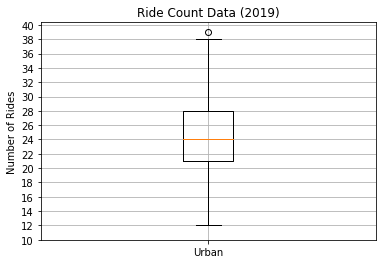

In [151]:
# box-and-whisker plot, ride count, urban
x_labels = ["Urban"] 
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# title, y-axis label, grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()

plt.show()

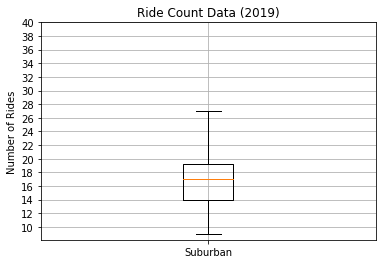

In [154]:
# box-and-whisker plot, ride count, suburban
x_labels = ["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

# title, y-axis label, grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()

plt.show()

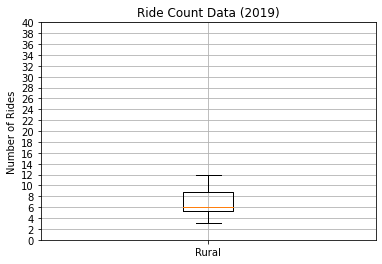

In [156]:
# box-and-whisker plot, ride count, rural
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

# title, y-axis label, grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41, step = 2.0))
ax.grid()

plt.show()

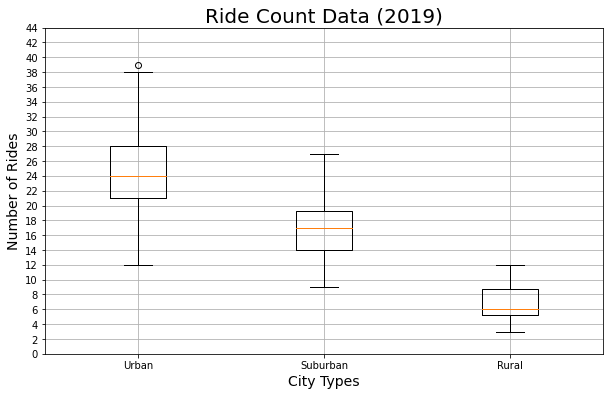

In [163]:
# add all ride count box-and-whisker plots
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fix, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(ride_count_data, labels = x_labels)

# title, y-axis label, grid
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0, 45, step = 2.0))
ax.grid()

#save figure
plt.savefig("Plots_and_Figures/Fig2.png")

plt.show()

In [165]:
# get city of outlier value 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


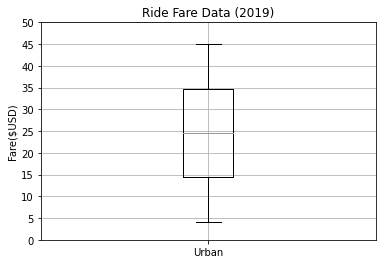

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [166]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()

plt.show()

# title and series for summary
print("Summary Statistics")
urban_fares.describe()

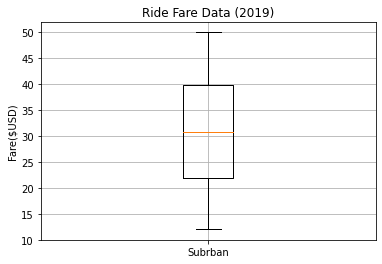

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [169]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 51, step = 5.0))
ax.grid()

plt.show()

# title and series for summary
print("Summary Statistics")
suburban_fares.describe()

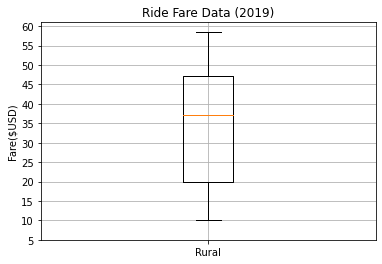

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [172]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 61, step = 5.0))
ax.grid()

plt.show()

# title and series for summary
print("Summary Statistics")
rural_fares.describe()

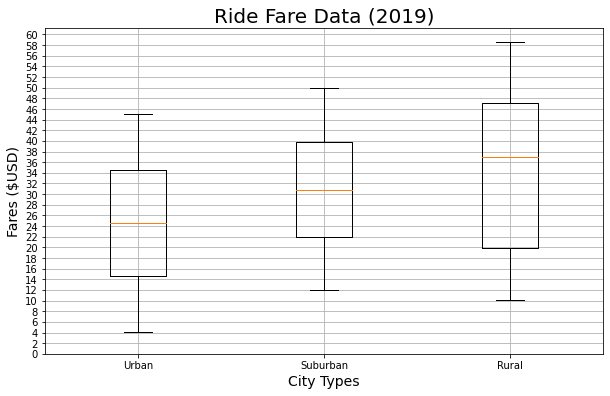

In [179]:
# add all fare box-and-whisker plot
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(fare_data, labels = x_labels)

# title, labels, grid
ax.set_title('Ride Fare Data (2019)', fontsize = 20)
ax.set_ylabel('Fares ($USD)', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0, 62, step = 2.0))
ax.grid()

# save fig
plt.savefig("Plots_and_Figures/Fig3.png")

plt.show()

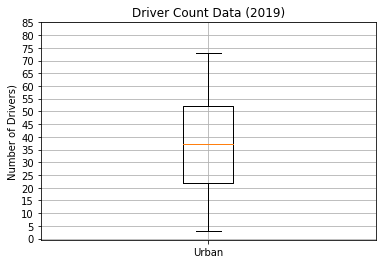

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [183]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()

plt.show()

# title and series for summary
print("Summary Statistics")
urban_drivers.describe()

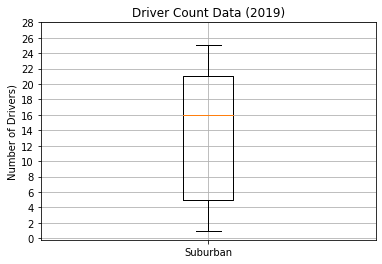

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [185]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step = 2.0))
ax.grid()

plt.show()

# title and series for summary
print("Summary Statistics")
suburban_drivers.describe()

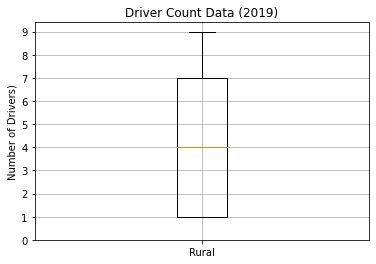

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [189]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step = 1.0))
ax.grid()

plt.show()

# title and series for summary
print("Summary Statistics")
rural_drivers.describe()

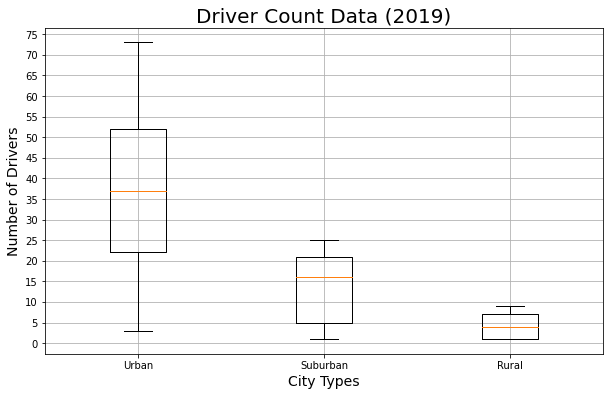

In [194]:
# add all driver count box-and-whisker plot
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(driver_data, labels = x_labels)

# title, labels, grid
ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0, 80, step = 5.0))
ax.grid()

# save fig
plt.savefig("Plots_and_Figures/Fig4.png")

plt.show()

In [196]:
# create pie chart for fare by city type
# get sum of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [197]:
# get sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [199]:
# calculate the percentages of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [203]:
# in one line
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

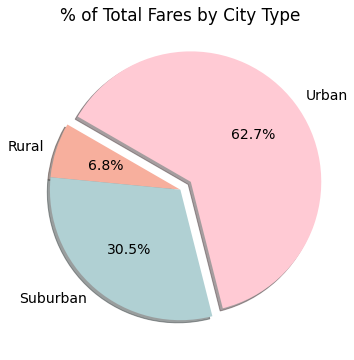

In [216]:
# build pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ['#f7af9d', '#b0d0d3', '#ffcad4'],
        explode = [0, 0, 0.1],
        autopct = '%.1f%%',
        shadow = True, 
        startangle = 150)

# title and font size
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("Plots_and_Figures/Fig5.png")

plt.show()

In [214]:
# pie chart for number of rides by city type
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

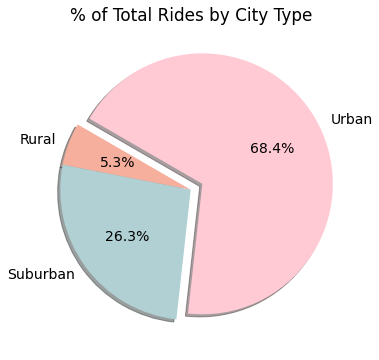

In [217]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ['#f7af9d', '#b0d0d3', '#ffcad4'],
        explode = [0, 0, 0.1],
        autopct = '%.1f%%',
        shadow = True, 
        startangle=150)

# title and font size
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("Plots_and_Figures/Fig6.png")

plt.show()

In [218]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

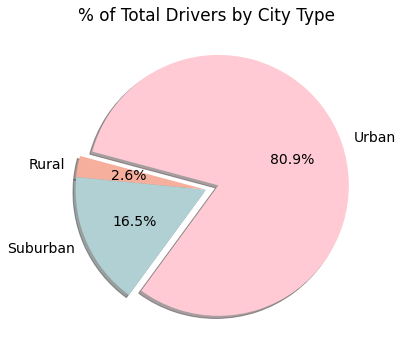

In [219]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ['#f7af9d', '#b0d0d3', '#ffcad4'],
        explode = [0, 0, 0.1],
        autopct = '%.1f%%',
        shadow = True, 
        startangle = 165)

# title and font size
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("Plots_and_Figures/Fig7.png")

plt.show()